# XOR-Problem

In [23]:
import numpy as np
import sys, os
import matplotlib.pyplot as plt
np.random.seed(42)

# Automatically detect project root (folder containing `lib`)
current_dir = os.path.dirname(os.path.abspath(__file__)) if "__file__" in globals() else os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.append(project_root)

print("Added to path:", project_root)


from lib import Model, Dense, Tanh, Sigmoid,ReLU, MSELoss, SGD

Added to path: c:\Users\Adham\Desktop\University Courses\Projects\Computational Intelligence\Neural-Network-Library_Advanced-Applications


In [ ]:
# Backpropagation validation via numerical gradient checking
def numerical_gradient_check(model, x, y, loss_fn, epsilon=1e-5):
    model.zero_grad()
    output = model.forward(x)
    loss = loss_fn.forward(output, y)
    loss_fn.backward()
    model.backward(loss_fn.grad)

    for param in model.parameters():
        param_grad_analytical = param.grad.copy()
        param_grad_numerical = np.zeros_like(param.data)

        it = np.nditer(param.data, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            original_value = param.data[idx]

            param.data[idx] = original_value + epsilon
            loss_plus = loss_fn.forward(model.forward(x), y)

            param.data[idx] = original_value - epsilon
            loss_minus = loss_fn.forward(model.forward(x), y)

            param_grad_numerical[idx] = (loss_plus - loss_minus) / (2 * epsilon)
            param.data[idx] = original_value
            it.iternext()

        relative_error = np.abs(param_grad_analytical - param_grad_numerical) / (np.abs(param_grad_analytical) + np.abs(param_grad_numerical) + 1e-8)
        max_relative_error = np.max(relative_error)
        print(f'Max relative error for parameter: {max_relative_error}')
        assert max_relative_error < 1e-5, "Gradient check failed!"
# Generate random data
# x = np.random.randn(10, 2)
# y = np.random.randn(10, 1)
activation_fn_array = [Tanh(), Sigmoid(),ReLU()]
# for activation_fn in activation_fn_array:
    # activation_fn.forward()


In [25]:
# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
y = np.array([[0],[1],[1],[0]], dtype=float)

In [26]:
model = Model()
model.add(Dense(4)) # 1st hidden layer with 4 neurons
model.add(Tanh())    # activation function
model.add(Dense(1)) # output layer
model.add(Sigmoid()) # activation function

# Force weight initialization
model._forward(X[:0]) 

model.compile(optimizer=lambda params: SGD(params, lr=0.5), loss=MSELoss())


In [27]:
history = model.fit(X, y, epochs=200, batch_size=4)
print('Training done')

Epoch 1/200 - loss: 0.250862
Epoch 20/200 - loss: 0.250731
Epoch 40/200 - loss: 0.250613
Epoch 60/200 - loss: 0.250508
Epoch 80/200 - loss: 0.250413
Epoch 100/200 - loss: 0.250326
Epoch 120/200 - loss: 0.250245
Epoch 140/200 - loss: 0.250169
Epoch 160/200 - loss: 0.250096
Epoch 180/200 - loss: 0.250025
Epoch 200/200 - loss: 0.249955
Training done


Predictions: 
 [[0.49841427]
 [0.503164  ]
 [0.49800014]
 [0.5025334 ]]
Rounded: 
 [[0.]
 [1.]
 [0.]
 [1.]]
True labels: 
 [[0.]
 [1.]
 [1.]
 [0.]]
Accuracy: 50.00%


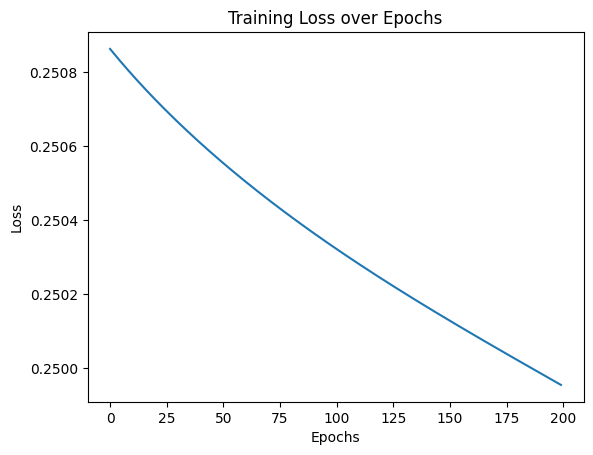

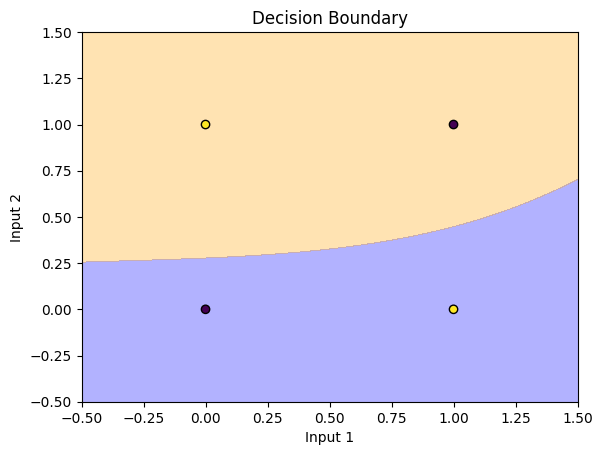

In [28]:
preds = model.predict(X)
print('Predictions:',"\n", preds)
print('Rounded:',"\n", np.round(preds))
print('True labels:',"\n", y)

if (preds.shape == y.shape):
    accuracy = np.mean(np.round(preds) == y)
    print(f'Accuracy: {accuracy*100:.2f}%')


plt.plot(history['loss'])
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# plot decision boundary
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid).reshape(xx.shape)
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3, colors=['blue', 'orange'])
plt.scatter(X[:,0], X[:,1], c=y.flatten(), edgecolors='k')
plt.title('Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.show()